In [1]:
import pandas as pd
import numpy as np
import tweepy
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
wordnet = WordNetLemmatizer()
import re
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import requests
from bs4 import BeautifulSoup as bs
!pip install selenium
from selenium import webdriver

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.2/400.2 kB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.1 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

1) Extract reviews of any product from ecommerce website like amazon

2) Perform emotion mining


In [39]:
apple_iphone13_reviews=[]

In [40]:
for i in range (1,30):
    op=[]
    url ="https://www.amazon.in/Apple-iPhone-13-128GB-Starlight/product-reviews/B09G9D8KRQ/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"+str(i)
    response = requests.get(url)
    soup = bs(response.content,"html.parser")
    reviews = soup.findAll("span",attrs = {"class","a-size-base"})
    for i in range(len(reviews)):
        op.append(reviews[i].text)
    apple_iphone13_reviews = apple_iphone13_reviews+op

2.2 Downloading review from Amazon.in for the phone iPhone 13


In [41]:
apple_iphone13_reviews = list(set(apple_iphone13_reviews))

In [42]:
apple_iphone13_reviews

['',
 '1,005 people found this helpful',
 '\nExcellent\n',
 '\n\n            1 star\n          \n',
 '\n\n            \n              3%\n            \n          \n',
 '\n            My honest review after going broke buying this depreciating object.I have been using android phones since the last 10 years and finally decided to switch to iPhone! I used to roast iPhone for its prices, lack of features and also things like power adapter not given in box etc, but my last android phone (iqoo 7 legend) had lot of software related issues and battery issues after updating it to android 12, tired of bugs and software glitches in android, I finally decided to buy a iPhone and switch from android to iOS And Boy Was I right!I never even held an iPhone In my life before because of its price, but now I made a great choice even if I had to spend all my savings on it.iPhone 13 is so smooth that even my IQOO 7 Legend with 120hz feels slower than it even if iPhone has only 60hz. And I can’t believe wha

2.3 Cleaning the text

In [43]:
txt_upd = ' '.join(apple_iphone13_reviews)

In [44]:
txt_upd = re.sub("[^A-Za-z" "]+"," ",txt_upd).lower() #remove special character
txt_upd = re.sub("[0-9" "]+"," ",txt_upd).lower() #remove numbers
txt_upd = re.sub(r'^https?:\/\/.*[\r\n]*', '', txt_upd).lower() #remove hyperlink

In [45]:
text_tokens = word_tokenize(txt_upd)

In [46]:
tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]

2.4 Create the DF

In [47]:
tf = TfidfVectorizer()

In [48]:
text_tf = tf.fit_transform(tokens_without_sw)

In [49]:
feature_names = tf.get_feature_names_out()
dense = text_tf.todense()
denselist = dense.tolist()
df =pd.DataFrame(denselist, columns=feature_names)

In [50]:
df

,absolutely,adapter,add,adjusted,adopt,airplay,airtel,alphabet,alternate,amazing,...,wider,widest,working,works,world,worst,worth,year,years,youtube
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1399,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1401,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1402,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
word_list = ' '.join(df)

In [52]:
wordcloud = WordCloud(background_color='black',
                      width=2500,
                      height=2000).generate(word_list)

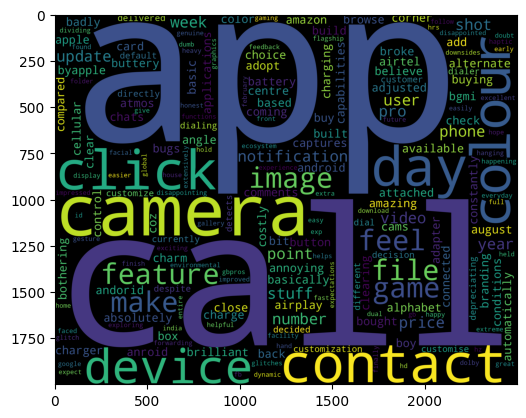

In [53]:
plt.imshow(wordcloud)

3 Sentimental Analysis

In [54]:
with open("positive-words.txt","r") as pw:
    positive_words = pw.read().split("\n")

In [55]:
positive_words = positive_words[35:]

In [56]:
with open("negative-words.txt","r", encoding='latin-1') as nw:
    negative_words = nw.read().split("\n")

In [57]:
negative_words = negative_words[35:]

In [58]:
txt_neg_in_nw = ' '.join([word for word in df if word in negative_words])

In [59]:
wordcloud_neg = WordCloud(
                      background_color='black',
                      width=2500,
                      height=2000
                     ).generate(txt_neg_in_nw)

In [60]:
txt_pos_in_pw = ' '.join([word for word in df if word in positive_words])

In [61]:
wordcloud_pos = WordCloud(
                      background_color='black',
                      width=2500,
                      height=2000
                     ).generate(txt_pos_in_pw)

4 Conclusion

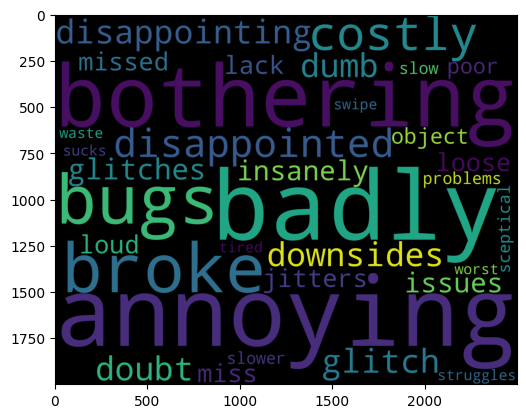

In [62]:
plt.imshow(wordcloud_neg)

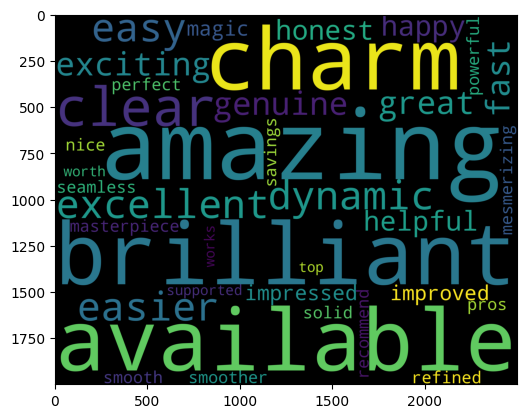

In [63]:
plt.imshow(wordcloud_pos)